# Lab 8 - Principal Component Analysis

## Name and netid: Abhay Narayanan      (abhayn2)

## Due: Nov 10, 2023 at 11:59 PM 

### Logistics: 

### What You Will Need To Know For This Lab:

- Eigendecomposition
- Singular Value Decomposition
- Principal Component Analysis

### Preamble (Don't change this):

In [27]:
from __future__ import division
%pylab inline
import numpy as np
from sklearn import neighbors
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn.decomposition import PCA
from PIL import Image
from sklearn.cluster import KMeans
import scipy.spatial.distance as dist
from matplotlib.colors import ListedColormap


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Enable Interactive Plots

In [2]:
enable_interactive=False # If you want to rotate plots, set this to True. 
# When submitting your notebook, enable_interactive=False and run the whole notebook. 
# The interactive stuff can be a bit glitchy, so if you're having trouble, turn them off. 
if enable_interactive:
    # These packages allow us to rotate plots and what not.
    from IPython.display import display
    from IPython.html.widgets import interact

### Problem 1: Visualizing Principal Components (50 points)

In this problem, you will be implementing PCA, visualizing the principal components and using it to perform dimensionality reduction. 

Do not use a pre-written implementation of PCA for this problem (e.g. sklearn.decomposition.PCA). You should assume that the input data has been appropriately pre-processed to have zero-mean features.

In [3]:
# We will generate some data.
numpy.random.seed(seed=2232017)
true_cov = np.array([[1,.2,.3],[.2,1,.6],[.3,.6,1]]) #This is the true covariance matrix 
                                                     #of the data. Do not use it in your code!
data=(np.random.randn(1000,3)).dot(np.linalg.cholesky(true_cov).T) 

First, we visualize the data using a 3D scatterplot. 

Our data is stored in a variable called `data` where each row is a feature vector (with three features).

/var/folders/np/4ztwczcs2t13gfpvxkqzg36h0000gn/T/ipykernel_51163/1059038685.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


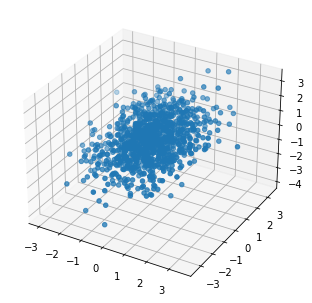

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:,0],data[:,1],data[:,2])
if enable_interactive:
    @interact(elev=(-90, 90), azim=(0, 360))
    def view(elev, azim):
        ax.view_init(elev, azim)
        display(ax.figure)

Write a function which implements PCA via the eigendecomposition. <b>(10 points)</b>

You will be given as input:
- A $(N,d)$ numpy array of data (with each row as a feature vector)

Your function should return a tuple consisting of the PCA transformation matrix (which is $(d,d)$), and a vector consisting of the amount of variance explained in the data by each PCA feature. Note that the PCA features are ordered in decreasing amount of variance explained, by convention.

Hints:
- The function <a href="http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.eigh.html">numpy.linalg.eigh</a> will be useful. Note that it returns its eigenvalues in *ascending* order. `numpy.fliplr` or similar may be useful as well.
- You can calculate the covariance matrix of the data by multiplying the data matrix with its transpose in the appropriate order, and scaling it. 
- Do not use numpy.cov -- we are assuming the data has zero mean beforehand, so the number of degrees of freedom is different (since the covariance estimate knows the mean in our case). 

In [5]:
def pcaeig(data):
    N = data.shape[0]
    cov_mat = (1/N) * data.T @ data # order decided to obtain d x d as mentioned
    Eigstuff = np.linalg.eigh(cov_mat)
    s = Eigstuff[0]
    s = s[::-1]
    W = Eigstuff[1]
    W = np.fliplr(W).T
    #W = W[::-1]
    return W, s

Now, run PCA on your data. Store your PCA transformation in a variable called `W`, and the amount of variance explained by each PCA feature in a variable called `s`. Print out the principal components (i.e. the rows of `W`) along with the corresponding amount of variance explained. <b>(5 points)</b>

In [6]:
# Now, run PCA on your data. The PCA transformation is stored in W, while the amount of variance is stored in s. 
W,s=pcaeig(data)


# Print out the principal components + the amount of variance they explain
for i in range(W.shape[1]):
    print("Principal Component",i, ":", W[i])
    print("Amount of variance explained:", s[i])
    print("\n")
#print(W)    

Principal Component 0 : [-0.37919732 -0.6615397  -0.64697343]
Amount of variance explained: 1.7740242208390096


Principal Component 1 : [-0.91750747  0.35945511  0.17021185]
Amount of variance explained: 0.814591489512416


Principal Component 2 : [-0.119956   -0.65814683  0.74327203]
Amount of variance explained: 0.3866390675212561




We can visualize the principal components on top of our data. The first principal component is in red, and captures the most variance. The second principal component is in green, while the last principal component is in yellow.

We generated our data from am *elliptical distribution*, so it should be easy to visualize these components as the axes of the data (which looks like an ellipsoid).

/var/folders/np/4ztwczcs2t13gfpvxkqzg36h0000gn/T/ipykernel_51163/611140663.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axb = Axes3D(figb)


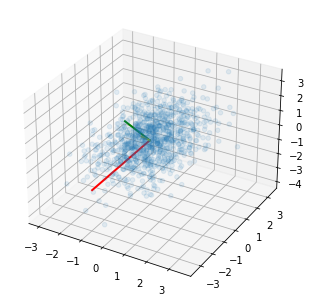

In [7]:
figb = plt.figure()
axb = Axes3D(figb)
axb.scatter(data[:,0],data[:,1],data[:,2],alpha=0.1)
c=['r-','g-','y-']
for var, pc,color in zip(s, W,c):
    axb.plot([0, 2*var*pc[0]], [0, 2*var*pc[1]], [0, 2*var*pc[2]], color, lw=2)
if enable_interactive:
    @interact(elev=(-90, 90), azim=(0, 360))
    def view(elev, azim):
        axb.view_init(elev, azim)
        display(axb.figure)

If done correctly, the red line should be longer than the green line which should be longer than the yellow line.

Now, you will implement functions to generate PCA features.

Write a function which implements dimension reduction via PCA. It takes in three inputs:
- A $(N,d)$ numpy array, `data`, with each row as a feature vector
- A $(d,d)$ numpy array, `W`, the PCA transformation matrix (e.g. generated from `pcaeig` or `pcasvd`)
- A number `k`, which is the number of PCA features to retain

It should return a $(N,k)$ numpy array, where the $i$-th row contains the PCA features corresponding to the $i$-th input feature vector. <b>(5 points)</b>

In [8]:
def pcadimreduce(data,W,k):
    W = W[:k] # discarding all rows after first k rows
    N = data.shape[0] # all vars needed
    d = W.shape[0]
    new_PCA = np.zeros((N, d)) 
    
    for x in range(N):
        new_PCA[x] = W @ data[x]
        
    return new_PCA

Write a function which reconstructs the original features from the PCA features. It takes in three inputs:
- A $(N,k)$ numpy array, `pcadata`, with each row as a PCA feature vector (e.g. generated from `pcadimreduce`)
- A $(d,d)$ numpy array, `W`, the PCA transformation matrix (e.g. generated from `pcaeig` or `pcasvd`)
- A number `k`, which is the number of PCA features

It should return a $(N,d)$ numpy array, where the $i$-th row contains the reconstruction of the original $i$-th input feature vector (in `data`) based on the PCA features contained in `pcadata`. <b>(5 points)</b>

In [9]:
def pcareconstruct(pcadata,W,k):
    W = W[0:k].T # .T for reconstructing as in prof's notes, and discarding all rows after first k rows
    d = W.shape[0]
    N = pcadata.shape[0] # other notes
    new_PCA = np.zeros((N, d)) 
    
    for x in range(N):
        new_PCA[x] = W @ pcadata[x] # dot all data with new trimmed W
    return new_PCA

As a sanity check, if you take $k=3$, perform dimensionality reduction then reconstruction, you should get the original data back:

In [10]:
# Reconstructed data using all the principal components
reduced_data=pcadimreduce(data,W,3)
reconstructed_data=pcareconstruct(reduced_data,W,3)

print ("This should be small:",np.max(np.abs(data-reconstructed_data)))

This should be small: 2.6645352591003757e-15


One use of PCA is to help visualize data. The 3-D plots above are a bit hard to read on a 2-D computer screen or when printed out. 

Use PCA to to reduce the data to two dimensions. Visualize the first two PCA features with a scatter plot. Also, construct an approximation of the original features using the first two principal components into a $(N,d)$ array called `reconstructed_data`.<b>(10 points)</b>

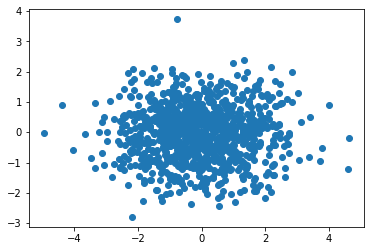

In [11]:
#Put your code here
reduced_data=pcadimreduce(data,W,2)
scatter(reduced_data[:,0],reduced_data[:,1])
reconstructed_data=pcareconstruct(reduced_data,W,2)

We can now visualize the data using two principal components in the original feature space.

/var/folders/np/4ztwczcs2t13gfpvxkqzg36h0000gn/T/ipykernel_51163/534669976.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axc = Axes3D(figc)


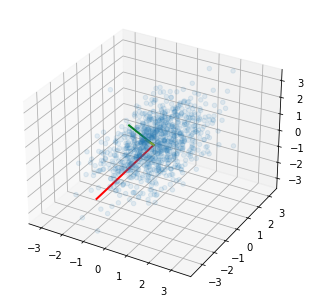

In [12]:
figc = plt.figure()
axc = Axes3D(figc)
axc.scatter(reconstructed_data[:,0],reconstructed_data[:,1],reconstructed_data[:,2],alpha=0.1)
c=['r-','g-','y-']
for var, pc,color in zip(s, W,c):
    axc.plot([0, 2*var*pc[0]], [0, 2*var*pc[1]], [0, 2*var*pc[2]], color, lw=2)
    
if enable_interactive:
    @interact(elev=(-90, 90), azim=(0, 360))
    def view(elev, azim):
        axc.view_init(elev, azim)
        display(axc.figure)

If done correctly, you should see no component of the data along the third principal direction, and the data should lie in a plane. This may be easier to see with the Interactive Mode on. 

Use PCA to reduce the data to one dimension and store the one dimensional PCA feature in `reduced_data_1`. Construct an approximation of the original features using the first  principal component into a $(N,d)$ array called `reconstructed_data_1`. <b>(5 points)</b>

In [13]:
#Put your code here
reduced_data_1 = pcadimreduce(data,W,1)
reconstructed_data_1 = pcareconstruct(reduced_data_1,W,1)

We can now visualize this in the original feature space. 

/var/folders/np/4ztwczcs2t13gfpvxkqzg36h0000gn/T/ipykernel_51163/496516323.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axd = Axes3D(figd)


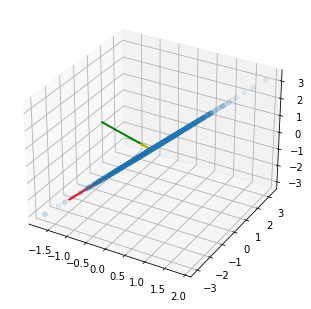

In [14]:
figd = plt.figure()
axd = Axes3D(figd)
axd.scatter(reconstructed_data_1[:,0],reconstructed_data_1[:,1],reconstructed_data_1[:,2],alpha=0.1)
c=['r-','g-','y-']
for var, pc,color in zip(s, W,c):
    axd.plot([0, 2*var*pc[0]], [0, 2*var*pc[1]], [0, 2*var*pc[2]], color, lw=2)
    
if enable_interactive:
    @interact(elev=(-90, 90), azim=(0, 360))
    def view(elev, azim):
        axd.view_init(elev, azim)
        display(axd.figure)

If done correctly, you should see no component of the data along the second and third principal direction, and the data should lie along a line. This may be easier with the Interactive Mode on. 

We can also visualize the PCA feature as a histogram:

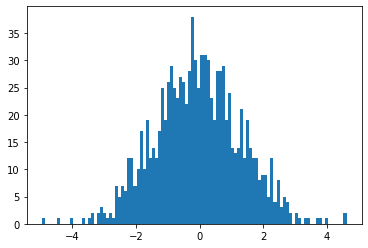

In [15]:
n, bins, patches = hist(reduced_data_1,100)

Finally, you will implement PCA via the SVD. <b>(5 points)</b>

You will be given as input:
- A $(N,d)$ numpy array of data (with each row as a feature vector)

Your function should return a tuple consisting of the PCA transformation matrix, and a vector consisting of the amount of variance explained in the data by each PCA feature. Note that the PCA features are ordered in decreasing amount of variance explained.

Hints:
- The function <a href="http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.svd.html">numpy.linalg.svd</a> will be useful. Use the full SVD (default).
- Be careful with how the SVD is returned in `numpy.linalg.svd` 

In [16]:
def pcasvd(data):
    N = data.shape[0]
    U, S, V = np.linalg.svd(data)
    
    S = S**2 / N
    
    return V, S

If your PCA implementation via the SVD is correct (and your Eigendecomposition implementation is correct), principal components should match between the SVD and PCA implementations (up to sign, i.e. the i-th principal component may be the negative of the i-th principal component from the eigendecomposition approach). 

Verify this by printing out the principal components and the corresponding amount of variance explained. You will not get any credit if the principal components (up to sign) and variances do not match the eigendecomposition. <b>(5 points)</b>

In [17]:
# Now, run PCA on your data. The PCA transformation is stored in Wsvd, while the amount of variance is stored in ssvd. 
Wsvd,ssvd=pcasvd(data)

# Print out the principal components + the amount of variance they explain
for i in range(Wsvd.shape[1]):
        print("Principal Component",i, ":", Wsvd[i])
        print("Amount of variance explained:", ssvd[i])
        print("\n")

Principal Component 0 : [0.37919732 0.6615397  0.64697343]
Amount of variance explained: 1.7740242208390091


Principal Component 1 : [-0.91750747  0.35945511  0.17021185]
Amount of variance explained: 0.814591489512416


Principal Component 2 : [-0.119956   -0.65814683  0.74327203]
Amount of variance explained: 0.38663906752125565




### Problem 2: PCA for Data Compression (30 points)

In this part of the lab, we will look at eigenfaces for compression using the <a href="http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html">Olivetti faces dataset</a>. 

In [18]:
# First, we load the Olivetti dataset
from sklearn.datasets import fetch_olivetti_faces


oli = fetch_olivetti_faces()
# Height and Width of Images are in h,w. You will need to reshape them to this size display them.
h=64
w=64
X = oli.data

X_t=X[-1]
X=X[:-1]

#This centering is unnecessary. it just makes the pictures a bit more readable. 

X_m=np.mean(X,axis=0)
X=X-X_m # center them
X_t=X_t-X_m

# The data set is in X. You will compress the image X_t. 

We can visualize the Olivetti Faces:
<img src="olivettifaces.gif"></img>

We will be making use of Scikit-Learn's <a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">PCA</a> functionality. 

Three functions will be useful for this problem :
- PCA.fit : Finds the requested number of principal components.
- PCA.transform : Apply dimensionality reduction (returns the PCA features)
- PCA.inverse_transform : Go from PCA features to the original features (Useful for visualizing)

You will also find the following useful:
- PCA.explained\_variance\_ratio\_ : Percentage of variance explained by each of the principal components

Plot the fraction of **unexplained** variance on `X` by PCA retaining the first $k$ principal components, where  $k=1,\ldots,200$. Note that this is a scree plot (normalized by the total variance). 

`numpy.cumsum` may be useful for this. <b>(10 points)</b>

Text(0, 0.5, 'Fraction of unexplained variance')

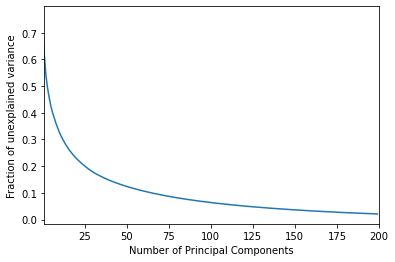

In [19]:
# Put your code here
start = 1
end = 201

for k in range(start, end):
    bleh = PCA(n_components = k)
    bleh.fit(X)
    
unexp = 1 - np.cumsum(bleh.explained_variance_ratio_) # taking 1 - percentage of explained 
    
plt.plot(unexp)
plt.xlim(1,200)

xlabel('Number of Principal Components')
ylabel('Fraction of unexplained variance')

Based on the Scree plot, propose a reasonable number of principal components to keep, in order to perform dimensionality reduction. Justify your choice. <b>(5 points)</b>

There is a range of correct answers (but you need to justify yours!). 

A reasonable number of principal components to keep is around 25, because this is the elbow of the graph. It is the point where the rate of decrease of the fraction of unexplained variance very quickly falls off after this point, making it not worth it to retain a higher number of principal components. Selecting the elbow is the standard usually.

Visualize the first 5 principal components as well as the 30th, 50th and 100th principal components, which are called *eigenfaces* in this context. Assuming your PCA object is called `pca`, the eigenfaces are contained in `pca.components_`, where each row is a principal component. 

The following code may be useful:

    figure()
    imshow( image , cmap = cm.Greys_r)
    
where image is the appropriately reshaped principal component (to `h` rows and `w` columns). What can you say about later eigenfaces compared to earlier ones? <b>(5 points)</b>

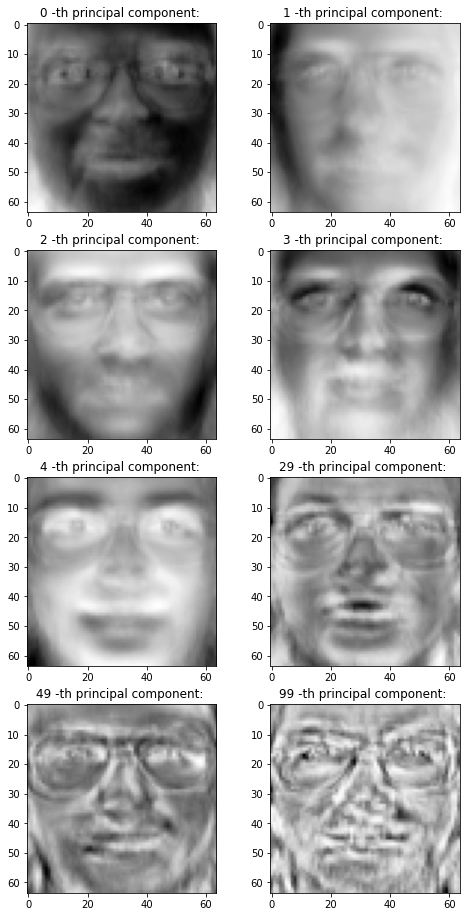

In [31]:
fn=np.asarray([0,1,2,3,4,29,49,99])

figure(figsize=(8,16))
for i in range(fn.size):
    subplot(4,2,i+1)
    title("{} -th principal component: ".format(fn[i]))
    imshow((bleh.components_[fn[i]]).reshape((h,w)),cmap=cm.Greys_r)

Later eigenfaces capture more detail as compared to earlier ones (e.g. they're specific to some guy). 

Now, you will compress an image, `X_t`, using PCA. 

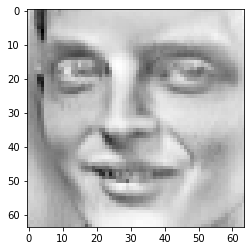

In [32]:
# This is what X_t looks like:
imshow((X_t).reshape((h,w)),cmap=cm.Greys_r)

Display the image in `X_t`'s approximation using the first `i` principal components (learned from `X`)  where i=1,10,20,...,100 (i.e. in increments of 10), then 120,140,160,180,200 (i.e. in increments of 20).

Do this by the following procedure:
1. Determine the PCA transformation (i.e. fit) on `X`. 
2. Transform `X_t` to the PCA features determined by `X`.
3. Retain the first `i` PCA features of the transformed `X_t` (set the others to zero). 
4. Transform the result of step 3 back to the original feature space. 

<b>(5 points)</b>

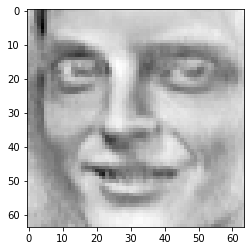

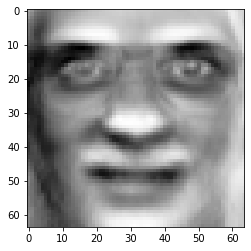

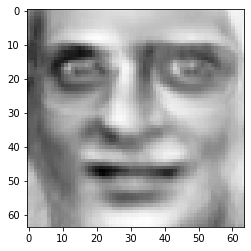

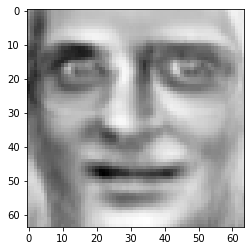

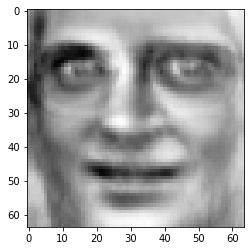

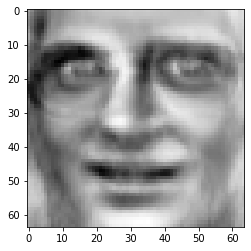

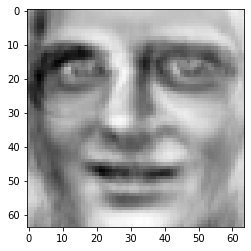

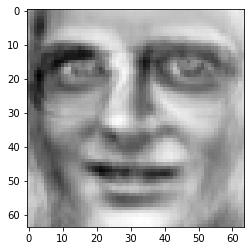

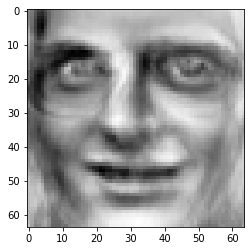

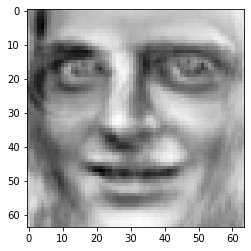

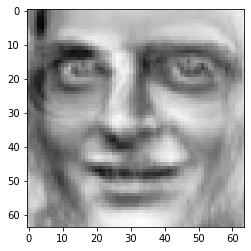

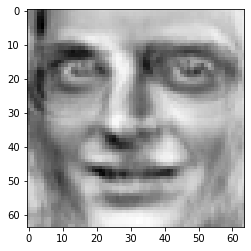

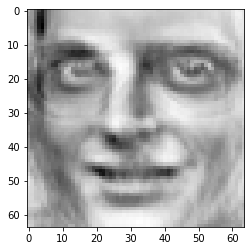

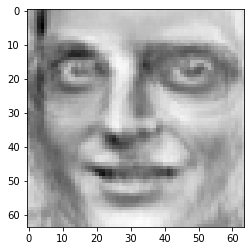

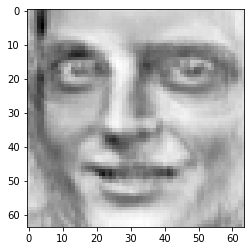

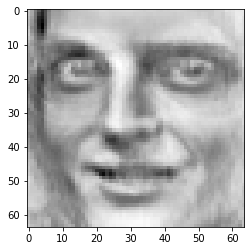

In [42]:
# Put your code here.
woo = PCA()
woo.fit(X)
image = np.reshape(woo.inverse_transform(woo.transform(X_t.reshape(1,-1))), (h,w))
figure(1)
imshow(image, cmap = cm.Greys_r);


for x in range(10, 101, 10):
    ye = PCA(n_components = x)
    ye.fit(X)
    image = np.reshape(ye.inverse_transform(ye.transform(X_t.reshape(1,-1))), (h,w))
    figure(x)
    imshow(image, cmap = cm.Greys_r);


for y in range(120, 201, 20):
    yesh = PCA(n_components = y)
    yesh.fit(X)
    image = np.reshape(yesh.inverse_transform(yesh.transform(X_t.reshape(1,-1))), (h,w))
    figure(y)
    imshow(image, cmap = cm.Greys_r);

How many principal components would you keep to compress the image? Why? (You may be qualitative or quantitative) <b>(5 points)</b>

I would keep some value roughly midway within 10 to 100 (perhaps 60) as it retains sufficient information to be similar to the original. Increasing beyond this does not substantially improve quality. It's a value that allows for the tradeoff between quality and performance.